# Проект: Исследование стартапов

- Автор: Владимир Куцев
- Дата: 27.04.2025

## Введение 

**Цель** - проверить ряд исторических данных на адекватность и провести исследовательский анализ рынка стартапов.

Будут использованы следующие датасеты:
- `acquisition` (**df_buys**) - содержит информацию о покупках одними компаниями других компаний
- `company_and_rounds` (**df_cnr**) - содержит информацию о компаниях и раундах финансирования
- `education` (**df_educ**) - содержит информацию об образовании сотрудника
- `people` (**df_ppl**) - cодержит информацию о сотрудниках
- `degrees` (**df_dgrs**) - содержит информацию о типе образования сотрудника

А также дополнительные (добавятся при необходимости):
- `fund` - содержит информацию о фондах
- `investment` - одержит информацию о раундах инвестирования

**План работы**:
1. Знакомство с данными: загрузка и первичная предобработка
2. Предобработка данных, предварительное исследование
3. Исследовательский анализ объединённых таблиц
4. Итоговый вывод и рекомендации


## Знакомство с данными: загрузка и первичная предобработка



### Вывод общей информации, исправление названия столбцов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
try:
    from phik import phik_matrix
except ImportError:
    !pip install phik
    from phik import phik_matrix

     |████████████████████████████████| 686 kB 1.8 MB/s eta 0:00:01


In [5]:
df_buys = pd.read_csv('/datasets/acquisition.csv')
df_buys.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [6]:
df_buys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [7]:
df_cnr = pd.read_csv('/datasets/company_and_rounds.csv')
print(df_cnr.head())

   company  ID      name category  code     status founded  at closed  at  \
0          1.0  Wetpaint            web  operating  2005-10-17        NaN   
1          1.0  Wetpaint            web  operating  2005-10-17        NaN   
2          1.0  Wetpaint            web  operating  2005-10-17        NaN   
3         10.0   Flektor    games_video   acquired         NaN        NaN   
4        100.0     There    games_video   acquired         NaN        NaN   

             domain network  username country  code  investment  rounds  ...  \
0  wetpaint-inc.com   BachelrWetpaint           USA                 0.0  ...   
1  wetpaint-inc.com   BachelrWetpaint           USA                 0.0  ...   
2  wetpaint-inc.com   BachelrWetpaint           USA                 0.0  ...   
3       flektor.com               NaN           USA                 0.0  ...   
4         there.com               NaN           USA                 0.0  ...   

   milestones  funding  round  id  company  id  funded  

In [8]:
df_cnr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [9]:
df_ppl = pd.read_csv('/datasets/people.csv')
df_ppl.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [10]:
df_ppl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [11]:
df_educ = pd.read_csv('/datasets/education.csv')
df_educ.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [12]:
df_educ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [13]:
df_dgrs = pd.read_csv('/datasets/degrees.csv')
df_dgrs.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [14]:
df_dgrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Кроме таблицы `df_cnr`, все названия столбцов приведены к snake_case. Исправим искомую таблиицу.

In [15]:
new_columns = []
for column in df_cnr.columns:
    new_columns.append(column.replace('  ', '_'))
df_cnr.columns = new_columns
df_cnr.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Присутствует также столбец **company_ID** в таблице `df_cnr`, однако у него уже есть дубликат **company_id**, поэтому пока оставим без изменений.

### Смена типов и анализ пропусков

Столбцы с датой встречаются в трех датафреймах, приведем их к нужному формату.

In [16]:
df_buys['acquired_at'] = pd.to_datetime(df_buys['acquired_at'])

In [17]:
for column in ['founded_at', 'closed_at', 'funded_at']:
    df_cnr[column] = pd.to_datetime(df_cnr[column])

In [18]:
df_educ['graduated_at'] = pd.to_datetime(df_buys['acquired_at'])

Оценим пропуски

In [19]:
df_buys.isna().mean()

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

In [20]:
df_cnr.isna().mean()

company_ID             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id             0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

In [21]:
df_ppl.isna().mean()

id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

In [22]:
df_dgrs.isna().mean()

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

In [23]:
df_educ.isna().mean()

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.914442
dtype: float64

Как и было заявлено, данные являются неполными.
1. Таблица `df_buys` содержит данные о **9407** покупках. Среди них **0.3%** имеют пропуски в датах транзакций и **80%** в формате оплаты. Кол-во пропусков в датах незначительно, при необходимости их можно удалить.
2. Таблица `df_cnr` содержит **217773** записи. Пропуски содержатся во всех столбцах, исследуем дополнительно в пункте **3.4**.
3. Таблица `df_ppl` содержит данные о **226709** сотрудниках. Менее **0.1%** пропусков содержат имя и фамилия (для анализа эти столбцы вряд ли полезны), более **80%** - company_id и network_username.
4. Таблицы `df_dgrs` и `df_educ` содержит данные о **109609** сотрудниках. Существенные пропуски в degree_type (**10%**), subject (**26%**), graduated_at (**47%**). Название института содержит менее **0.05%**, чем также можно пренебречь.
- Общий вывод - среди пропусков нет тех, которые стоит заменить и нет тех, которые стоит удалить.

Оптимизируем типы данных в таблицах.
- таблица `df_buys` содержит 4 столбца в формате **int64** и 2 в **object**: эти типы данных верные, однако их можно оптимизировать
- таблица `df_cnr` содержит 3 столбца **datetime64**, 13 столбцов **float64** и 7 **object**. Все численные столбцы целочисленные, однако оптимизировать их мешают пропуски.
- в таблицах `df_ppl`, `df_dgrs`, `df_educ` могут быть оптимизирваны только столбцы с **id**

In [24]:
for column in ['id', 'acquiring_company_id', 'acquired_company_id', 'price_amount']:
    df_buys[column] = pd.to_numeric(df_buys[column], downcast='integer')
df_buys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int32         
 2   acquired_company_id   9407 non-null   int32         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2), int64(1), object(1)
memory usage: 312.5+ KB


In [25]:
df_ppl['id'] = pd.to_numeric(df_ppl['id'], downcast='integer')
df_dgrs['id'] = pd.to_numeric(df_dgrs['id'], downcast='integer')


## Предобработка данных, предварительное исследование


### Раунды финансирования по годам

In [26]:
df_cnr['funded_at_y'] = df_cnr['funded_at'].dt.year
df_cnr_yr = df_cnr.pivot_table(index = 'funded_at_y', values='raised_amount', aggfunc=['count', 'median'])
df_cnr_yr = df_cnr_yr[df_cnr_yr['count']['raised_amount'] > 50]
df_cnr_yr

,count,median
,raised_amount,raised_amount
funded_at_y,,
1999.0,76,2000000.0
2000.0,125,4200000.0
2001.0,96,3000000.0
2002.0,116,4200000.0
2003.0,159,3000000.0
2004.0,291,5000000.0
2005.0,1633,5500000.0
2006.0,2436,5000000.0


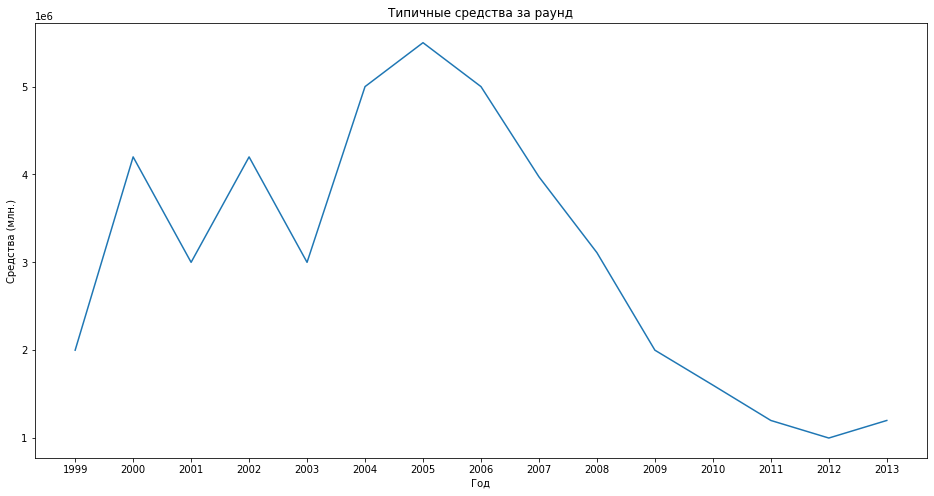

In [27]:
df_cnr_yr['median']['raised_amount'].plot(kind='line', figsize=(16,8))
plt.xlabel('Год')
plt.ylabel('Средства (млн.)')
plt.title('Типичные средства за раунд')
plt.xticks(range(1999, 2014, 1))
plt.show()

Количество раундов со временем строго растет. Размер средств колеблется с **1999** г. по **2003**, затем растет, достигая пика в **2005** и идет на спад. Однако, хотя о тенденции говорить рано, в **2013** наблюдался небольшой рост.

При этом количество раундов со временем строго возрастает.


### Люди и их образование

In [28]:
df_ppl_educ = df_ppl.merge(df_educ, how='left', left_on='id', right_on='person_id')
df_ppl_educ['is_educ'] = df_ppl_educ['instituition'].isna()
df_com_ep = df_ppl_educ.groupby('company_id').agg({'id_x':'count','is_educ':'mean'})
df_com_ep.head()

,id_x,is_educ
company_id,,
1.0,3,0.333333
2.0,1,0.000000
3.0,5,0.200000
4.0,18,0.055556
5.0,84,0.190476


In [29]:
df_com_ep['id_x'].describe()

count    22922.000000
mean         1.953974
std          4.087373
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        376.000000
Name: id_x, dtype: float64

Так как в основном каждая компания представлена лишь одним сотрудником, будем считать большиими компаниями те, где сотрудников больше.

In [30]:
df_com_ep['is_big'] = df_com_ep['id_x'] > 1
df_com_ep.groupby('is_big')['is_educ'].mean()

is_big
False    0.592862
True     0.242852
Name: is_educ, dtype: float64

В небольших компаниях средняя доля струдников с информацией об образовании - **59%**, в больших - **24%**. Можно удтверждать, что количество искомой информации зависит от размера компании.

In [31]:
educ_ids = set(df_educ['person_id'])
df_dgrs['object_id'] = df_dgrs['object_id'].str.replace('p:','').astype('float64') #приведем столбец к единому формату
dgrs_ids = set(df_dgrs['object_id'])
dgrs_ids == educ_ids

True

Так как `df_dgrs` содержит информацию об образовании тех же сотрудников, добавление этой таблицы не повлияет на результат.

In [32]:
df_educ_dgrs = df_educ.merge(df_dgrs, left_on='person_id', right_on='object_id')
df_educ_dgrs.head()

,id_x,person_id,instituition,graduated_at,id_y,object_id,degree_type,subject
0,1,6117,NaN,2007-05-30,1,6117.0,MBA,NaN
1,2,6136,"Washington University, St. Louis",2007-07-01,2,6136.0,BA,"English, French"
2,2,6136,"Washington University, St. Louis",2007-07-01,3,6136.0,MS,Mass Communication
3,3,6136,Boston University,2007-05-01,2,6136.0,BA,"English, French"
4,3,6136,Boston University,2007-05-01,3,6136.0,MS,Mass Communication


### Объединять или не объединять — вот в чём вопрос

Столбец network_username встречается в таблицах `df_cnr` и `df_ppl`. Имеющиеся данные говорят о том, что в первом случае речь о нике компании, а во втором - человека. Проверим:

In [33]:
cnr_uns = set(df_cnr['network_username'])
ppl_uns = set(df_ppl['network_username'])
print(f'Кол-во совпадений: {len(ppl_uns & cnr_uns)}')
print(f'Общее кол-во: {len(ppl_uns | cnr_uns)}, ppl_uns:{len(ppl_uns)}, cnr_uns:{len(cnr_uns)}')
print(f'Доля совпадений: {round(len(ppl_uns & cnr_uns)/len(ppl_uns | cnr_uns)*100, 2)}%')

Кол-во совпадений: 2200
Общее кол-во: 115794, ppl_uns:38422, cnr_uns:79572
Доля совпадений: 1.9%


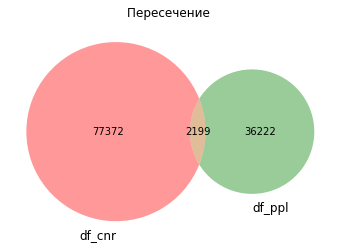

In [34]:
# Код ревьюера
!pip install matplotlib-venn -q
from matplotlib_venn import venn2
first_id = set(df_cnr['network_username'].dropna().unique())
second_id = set(df_ppl['network_username'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('df_cnr', 'df_ppl'))

# Отображаем график
plt.title("Пересечение ")
plt.show()

Доля совпадений подтверждает информацию выше. Столбец непригоден для объединения данных. Во избежание путаницы переименуем столбец в `df_ppl`:

In [35]:
df_ppl = df_ppl.rename(columns={'network_username':'person_nu'})
df_ppl.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'person_nu'], dtype='object')


### Проблемный датасет и причина возникновения пропусков

In [36]:
#продублируем проценты пропусков
df_cnr.isna().mean()

company_ID             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id             0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
funded_at_y            0.758098
dtype: float64

In [37]:
print(df_cnr[df_cnr['company_ID'].isna()].head(3))

        company_ID name category_code status founded_at closed_at domain  \
217472         NaN  NaN           NaN    NaN        NaT       NaT    NaN   
217473         NaN  NaN           NaN    NaN        NaT       NaT    NaN   
217474         NaN  NaN           NaN    NaN        NaT       NaT    NaN   

       network_username country_code  investment_rounds  ...  \
217472              NaN          NaN                NaN  ...   
217473              NaN          NaN                NaN  ...   
217474              NaN          NaN                NaN  ...   

        funding_round_id  company_id  funded_at  funding_round_type  \
217472             457.0      1267.0 2005-01-01            series-a   
217473             471.0       558.0 2007-01-01               angel   
217474             575.0       746.0 2004-09-01               angel   

        raised_amount pre_money_valuation participants  is_first_round  \
217472     48000000.0                 0.0          2.0             1.0   
21747

In [38]:
df_cnr[df_cnr['company_ID'].isna()]['company_id'].isna().sum()

0

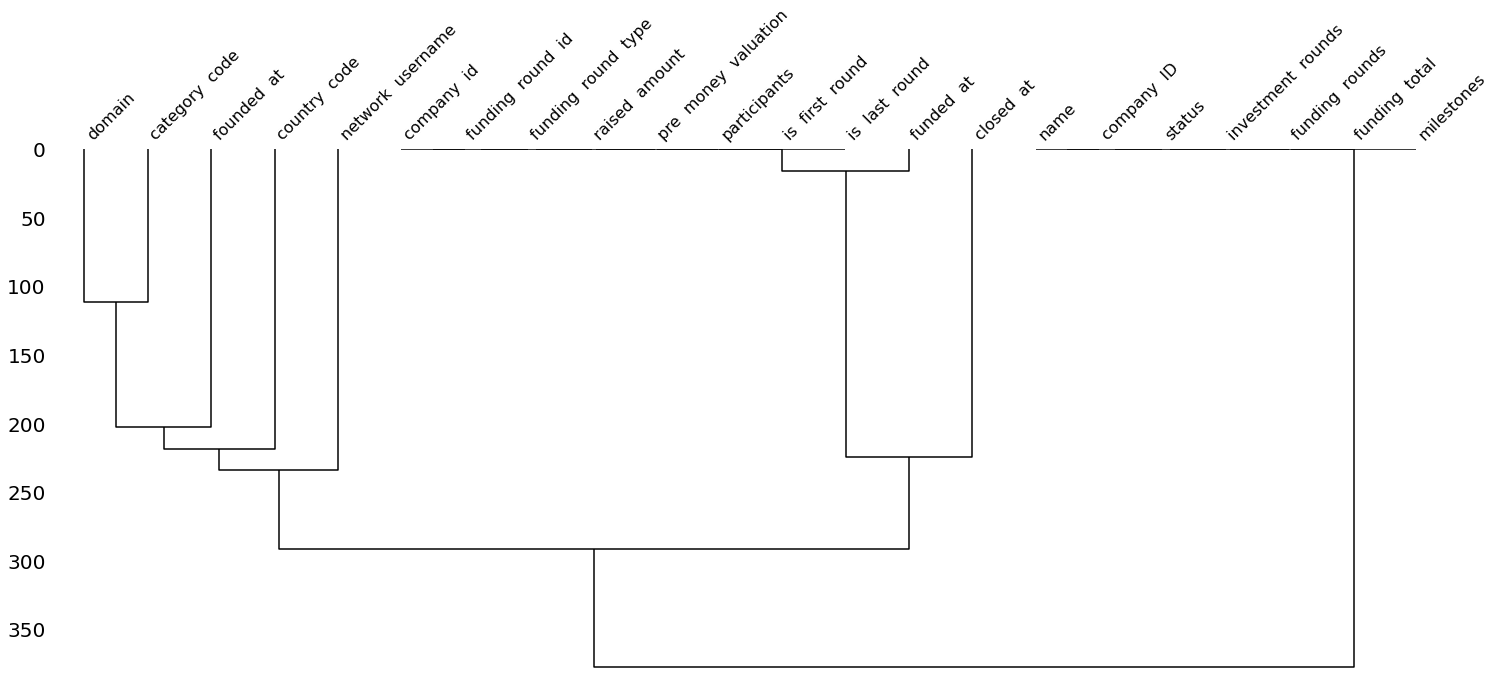

In [39]:
!pip install missingno -q
import missingno as msno
df_company_and_rounds_12 = pd.read_csv(r'https://code.s3.yandex.net/datasets/company_and_rounds.csv')
msno.dendrogram(df_company_and_rounds_12)
plt.show()

Гипотеза такова: методом `full` были соединены две таблицы:
- **companies** - со столбцами company_ID, name, category_code, status, founded_at, closed_at, domain,  network_username, country_code, investment_rounds.
- **rounds** - со столбцами funding_round_id, company_id, funded_at, funding_round_type, raised_amount, pre_money_valuation, participants, is_first_round, is_last_round.

In [40]:
#восстановим исходные таблицы
df_com = df_cnr.iloc[:, :13]
df_com = df_com.dropna(how='all')
df_com = df_com.rename(columns={'company_ID':'company_id'}) #теперь можем переименовать столбец в едином формате
df_com = df_com.drop_duplicates()
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [41]:
df_rnd = df_cnr.iloc[:, 13:] #созданный столбец также поместим сюда
df_rnd = df_rnd.dropna(how='all')
df_rnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_at_y          52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


Получили две отдельные таблицы. Из пропусков стоит обратить внимание на столбец `closrd_at` - всего **3449** непустых значений, вероятно остальные компании все еще функционируют, в дальнейшем можно создать столбец `is_closed`.


## Исследовательский анализ объединённых таблиц


### Объединение данных

In [42]:
df_interest = df_com[(df_com['funding_rounds'] > 0) | (df_com['investment_rounds'] > 0) | (df_com['status'] == 'acquired')]
df_interest.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0


In [43]:
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

In [44]:
for column in ['company_id', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']:
    df_interest[column] = pd.to_numeric(df_interest[column], downcast='integer')
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  int32         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  int16         
 10  funding_rounds     40747 non-null  int8          
 11  funding_total      40747 non-null  int64         
 12  milestones         40747 non-null  int8          
dtypes: datetime64[ns](2), int16(1), int32(1), int64(1), int8(2),

In [45]:
df_interest.isna().mean()

company_id           0.000000
name                 0.000000
category_code        0.133310
status               0.000000
founded_at           0.317569
closed_at            0.947775
domain               0.122537
network_username     0.488306
country_code         0.147373
investment_rounds    0.000000
funding_rounds       0.000000
funding_total        0.000000
milestones           0.000000
dtype: float64

Получившаяся таблица корректна. Подходящих для удаления пропусков нет, однако при необходимости все еще есть возможность создать столбец `is_closed`.


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [46]:
(df_interest['funding_total'] == 0).mean()

0.3159250987802783

**31.6%** компаний не финансировались. Исключим их из анализа

In [47]:
df_funded = df_interest[df_interest['funding_total'] != 0]
df_funded['funding_total'].describe()

count    2.787400e+04
mean     1.481652e+07
std      6.775936e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

Так как показатели могут отличаться друг от друга кратно, имеет смысл рассмотреть логарифм представленных средств.

In [48]:
df_funded['fd_log'] = np.log(df_funded['funding_total'])
df_funded['fd_log'].describe()

count    27874.000000
mean        14.605412
std          2.202743
min          5.673323
25%         13.122363
50%         14.757274
75%         16.213406
max         22.463732
Name: fd_log, dtype: float64

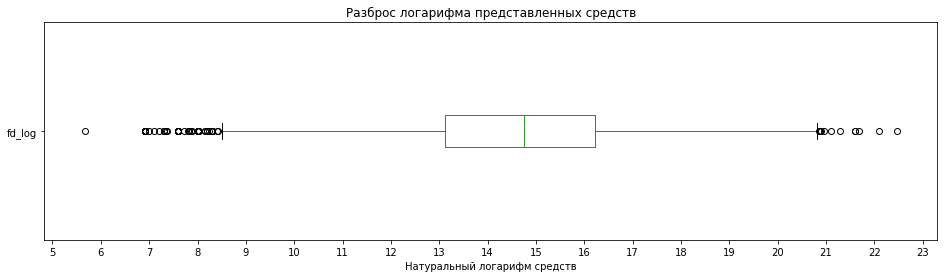

In [49]:
df_funded['fd_log'].plot(kind='box', vert=False, figsize=(16, 4))
plt.xticks(range(5,24,1))
plt.title('Разброс логарифма представленных средств')
plt.xlabel('Натуральный логарифм средств')
plt.show()

In [50]:
print(np.exp(8.5))
print(np.exp(21))

4914.768840299134
1318815734.4832146


В таком формате выбросами будут считаться значения меньше **5 тыс. д.е.** и больше **1.3 млрд. д.е.**


### Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

In [51]:
df_buyed_coms = df_interest.merge(df_buys, how='inner', left_on='company_id', right_on='acquired_company_id')
df_buyed_coms.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0,1,11,10,NaN,20000000,2007-05-30
1,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4,20,377,100,cash,0,2005-05-29
2,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3,1901,5,1001,cash_and_stock,47500000,2009-08-10
3,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0,4,3878,23054,10014,NaN,0,2010-09-30
4,100265,Coastal Supply Company,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0,0,0,1,6106,38215,100265,NaN,0,2011-09-06


In [52]:
df_free = df_buyed_coms[(df_buyed_coms['funding_total'] != 0)&((df_buyed_coms['price_amount'] == 1) | (df_buyed_coms['price_amount'] == 0))]
df_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 7 to 9386
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1618 non-null   int32         
 1   name                  1618 non-null   object        
 2   category_code         1553 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   domain                1546 non-null   object        
 7   network_username      812 non-null    object        
 8   country_code          1536 non-null   object        
 9   investment_rounds     1618 non-null   int16         
 10  funding_rounds        1618 non-null   int8          
 11  funding_total         1618 non-null   int64         
 12  milestones            1618 non-null   int8          
 13  id                

In [53]:
df_free.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
7,10054,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0,7,121500000,3,9288,23283,10054,cash_and_stock,0,2013-08-13
17,101312,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0,3,4000000,2,9653,11391,101312,NaN,0,2013-09-18
18,101340,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0,1,250000,1,7272,1972,101340,NaN,0,2012-06-18
19,10137,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0,3,1310000,2,8254,757,10137,cash_and_stock,0,2012-11-05
20,10139,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0,2,44925000,1,9326,44008,10139,NaN,0,2013-04-01


In [54]:
df_free['funding_total'].describe(percentiles=[0.01, 0.25, 0.75, 0.99])

count    1.618000e+03
mean     1.815296e+07
std      1.445030e+08
min      3.750000e+03
1%       2.000000e+04
25%      2.000000e+06
50%      6.000000e+06
75%      1.550000e+07
99%      1.515529e+08
max      5.700000e+09
Name: funding_total, dtype: float64

На этот раз разница в значениях не столь велика, поэтому воспользуемся стандартным методом.

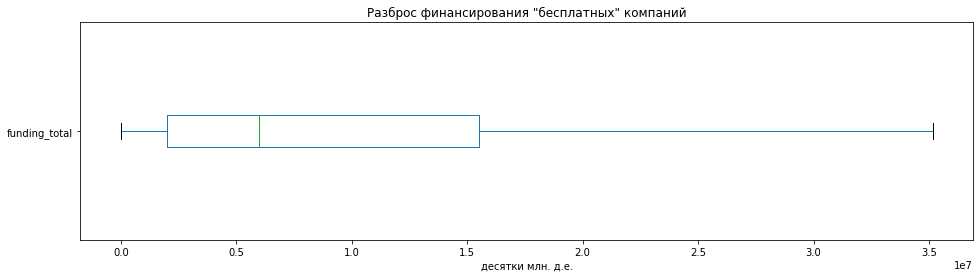

In [55]:
df_free['funding_total'].plot(kind='box', vert=False, figsize=(16, 4), showfliers=False)
plt.title('Разброс финансирования "бесплатных" компаний')
plt.xlabel('десятки млн. д.е.')
plt.show()

График показывает, что имеет смысл считать только верхнюю границу, нижняя - **0**

In [56]:
ft = df_free['funding_total']
ft.quantile(0.75) + 1.5*(ft.quantile(0.75) - ft.quantile(0.25))

35750000.0

Верхняя граница - **35.75 млн. д.е.**

In [57]:
(df_free['funding_total'] <= 35750000).mean()*100

90.91470951792337

Итог: нижней границы нет, перцентиль верхней границы - **91**


### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

Как меру разброса выбрана разность первого и третьего квартилей, так как обильное количество выбросов может исказить меры по типу размаха.

In [58]:
def q_delta(x):
    return x.quantile(0.75) - x.quantile(0.25)
df_cat = df_buyed_coms.groupby('category_code')['price_amount'].agg(['median', q_delta])
df_cat.head(10)

,median,q_delta
category_code,,
advertising,0,3000000
analytics,0,0
automotive,43000000,2400000000
biotech,13200000,250000000
cleantech,0,69000000
consulting,0,0
design,0,0
ecommerce,0,0
education,0,0


In [59]:
df_cat['median'].sort_values(ascending=False)[:8]

category_code
nanotech         584000000
manufacturing     72000000
real_estate       50000000
automotive        43000000
biotech           13200000
hospitality       12500000
finance             600000
news                     0
Name: median, dtype: int64

In [60]:
median_top = df_cat['median'].sort_values(ascending=False)[:7]

Мы видим, что ненулевые данные встречаются только для **7** категорий. Можно было бы отфильтровать нулевые покупки еще до группировки, однако мы не знаем причину их возникновения. Поэтому ограничим наш топ именно этим количеством.

In [61]:
delta_top = df_cat['q_delta'].sort_values(ascending=False)[:7]
delta_top

category_code
automotive        2400000000
real_estate        903500000
manufacturing      615000000
sports             260000000
biotech            250000000
finance            170750000
transportation     125000000
Name: q_delta, dtype: int64

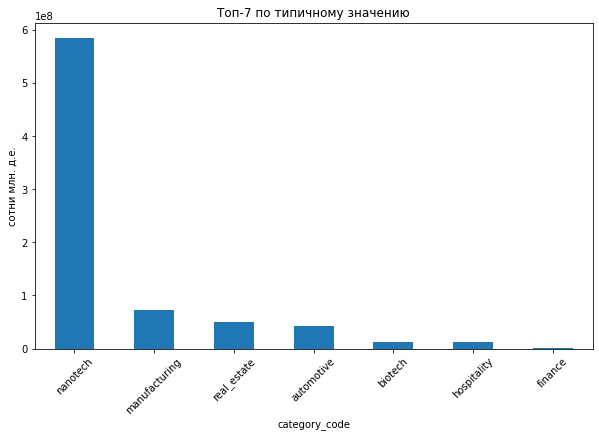

In [62]:
median_top.plot(kind='bar', rot=45, figsize=(10,6))
plt.title('Топ-7 по типичному значению')
plt.ylabel('сотни млн. д.е.')
plt.show()

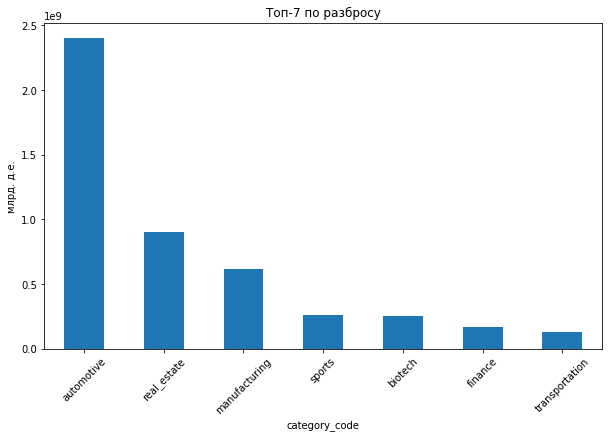

In [63]:
delta_top.plot(kind='bar', rot=45, figsize=(10,6))
plt.title('Топ-7 по разбросу')
plt.ylabel('млрд. д.е.')
plt.show()

Можно заметить, что как категории в обоих топах пересекаются. То есть более дорогие стартапы как правило и более высокие. Исключение - нанотехнологии. Такая аномалия может быть вызвана актуальностью категории.


### Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [67]:
cnt_rounds = df_interest.groupby('status')['funding_rounds'].mean()
cnt_rounds.sort_values(ascending=False)
rounds_top = cnt_rounds.sort_values(ascending=False)
cnt_rounds

status
acquired     0.523526
closed       1.381453
ipo          1.934375
operating    1.522658
Name: funding_rounds, dtype: float64

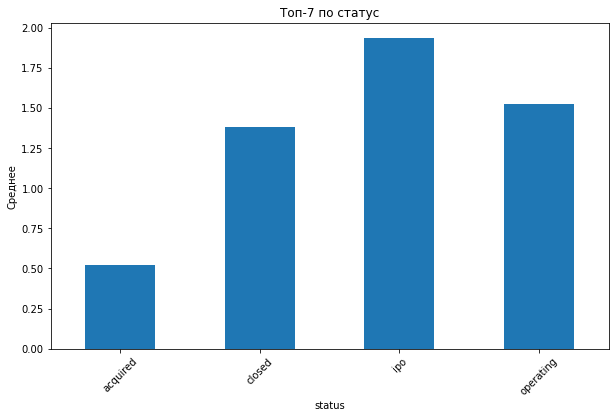

In [70]:
cnt_rounds.plot(kind='bar', rot=45, figsize=(10,6))
plt.title('Топ-7 по статус')
plt.ylabel('Среднее')
plt.show()

Больше  всего раундов наблюдается у компаний на IPO. У приобретенных компаний раундов меньше всего, что отвергает гипотезу заказчика.


## Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В ходе проекта был проведен анализ 5 датасетов, содержащих информацию о компаниях и сотруднниках. Исследовательский анализ показал, что проведенной предобработки недостаточно для полноценной работы. Ярким примером являются нулевые покупки, происхождение которых неизвестно, а влияние на результаты существенно.

Таким образом, главной рекомендацией для заказчика является поиск дополнительной информации, позволяющей скорректировать работу с данными.

Тем не менее, уже сейчас можно предположить, что приоритетным направлением для покупке является категория **nanotech** (цены продажи крайне высокие, риск сравнительно низкий). Также стоит отметить низкое среднее количество раундов у приобретенных компаний.